Instalando bibliotecas

In [1]:
# !pip uninstall pandas
# !pip install pandas
# !pip install pycaret[full]
# !pip install pyarrow

Importando bibliotecas

In [2]:
import pandas as pd
from pycaret.time_series import *

Importano base de dados

In [3]:
df = pd.read_parquet(r'df_consolidado_preenchido.parquet')
df_a = df['dst'][df['period'] == 'train_a']
# df_b = df['dst'][df['period'] == 'train_b']
# df_c = df['dst'][df['period'] == 'train_c']
df_a.head(3)

,dst
date,
1998-02-16 00:00:00,-7.00
1998-02-16 00:01:00,-7.05
1998-02-16 00:02:00,-7.10


In [4]:
df_a.shape

(1729440,)

<Axes: xlabel='date'>

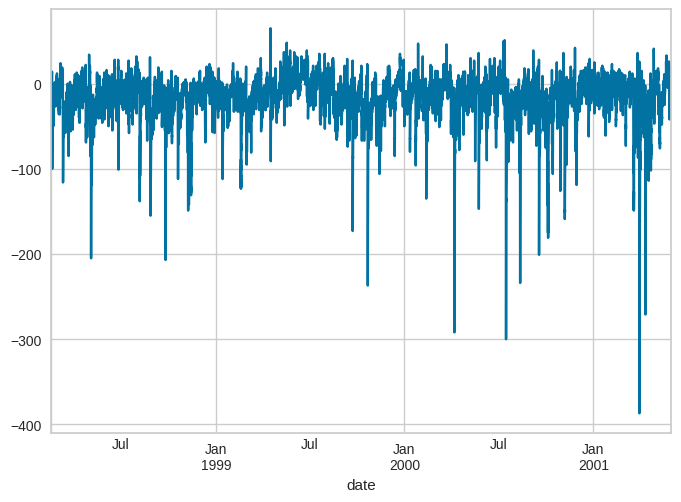

In [5]:
df_a.plot()

Inicializando o ambiente de treinamento e criando o pipeline de transformações

In [ ]:
setup = setup(df_a,
              fh = 3,
              session_id = 42,
              fold_strategy = 'expanding',
              # numeric_imputation_target = 'drift',
              )
# Obtenndo a lista de variáveis criadas para gerar o ambiente de treinamento
# get_config()

# Obtendo o valor da variável desejada
# get_config('y_train_transformed')

Removendo métricas de avaliação secundárias

In [ ]:
remove_metric('MAE')
remove_metric('MSE')
remove_metric('RMSLE')
remove_metric('MAPE')
remove_metric('TT (Sec)')

Treinando e avaliando modelos com validação cruzada

In [ ]:
best = compare_models()

Criando modelo selecionado

In [ ]:
best_model = create_model('ets',
                          deseasonalize = False,
                          fold=5)

Otimizando hiperparametros

In [ ]:
tuned_model, tuner = tune_model(best_model,
                                return_tuner=True,
                                # search_algorithm = "grid",
                                search_algorithm = "random",
                                optimize="RMSE",
                                )
tuned_model

Visualizando predição

In [ ]:
plot_model(best, plot = 'forecast')

Visualizando residuos

In [ ]:
plot_model(best, plot = 'residuals')

Realizando predições

In [ ]:
pred = predict_model(best, fh = 10)
pred

Obtendo resultados da predição

In [ ]:
pred.head()

Salvando pipeline do modelo

In [ ]:
save_model(best, 'ts_pred_pipeline')

Carregando pipeline do modelo

In [ ]:
loaded_best_pipeline = load_model('ts_pred_pipeline')
loaded_best_pipeline